In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Create histogram

In [2]:
# Load image
image = cv2.imread("../data/images/20201124_142837.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert from BGR to HLS
image_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# Extract Hue channel
hue_channel = image_hls[:, :, 0]        # OpenCV stores H in 0th index

# Compute histogram of Hue channel
hist = cv2.calcHist([hue_channel], [0], None, [180], [0, 180])      # 180 bins for Hue

# Normalise histogram to fit image height
hist = hist / hist.max() * image.shape[0]

# Create overlay image for histogram
hist_overlay = np.zeros_like(image)


Draw histogram over image

/tmp/ipykernel_211595/4053980394.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  (h * (image.shape[1] // 180), int(image.shape[0] - hist[h])),


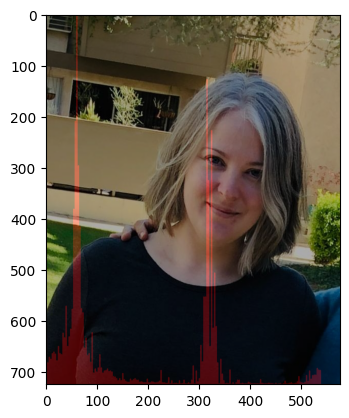

In [3]:
# Draw histogram as vertical line plot
for h in range(180):
    cv2.line(
        hist_overlay,
        (h * (image.shape[1] // 180), image.shape[0]),
        (h * (image.shape[1] // 180), int(image.shape[0] - hist[h])),
        (255, 0, 0), thickness=2)

overlayed_image = cv2.addWeighted(image_rgb, 0.7, hist_overlay, 0.3, 0)

# Display histogram over image
plt.imshow(overlayed_image)

Visualise Hue scale

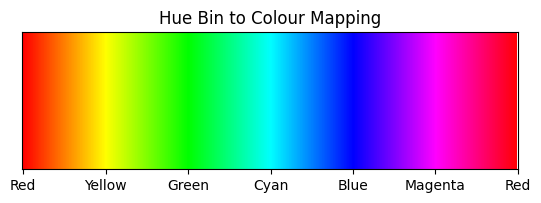

In [4]:
# Create 180 x 50 image where each pixel represents a different hue
hue_scale = np.zeros((50, 180, 3), dtype=np.uint8)

for i in range(180):
    hue_scale[:, i] = [i, 255, 255]      # Hue, Max Saturation, Max Lightness

# Convert from HLS to RGB for display
hue_scale_rgb = cv2.cvtColor(hue_scale, cv2.COLOR_HSV2RGB)

# Plot hue scale
plt.imshow(hue_scale_rgb)
plt.xticks([0, 30, 60, 90, 120, 150, 180], ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'])
plt.yticks([])
plt.title("Hue Bin to Colour Mapping")
plt.show()

Display Histogram of Image in HLS colourspace

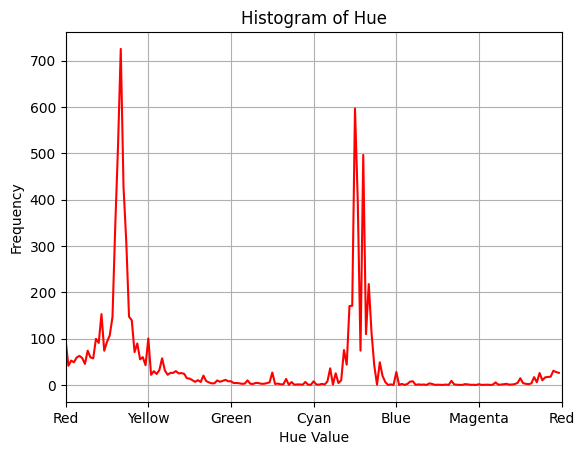

In [5]:
plt.plot(hist, color='r')
plt.title('Histogram of Hue')
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.xticks([0, 30, 60, 90, 120, 150, 180], ['Red', 'Yellow', 'Green', 'Cyan', 'Blue', 'Magenta', 'Red'])
plt.xlim([0, 180])      # Hue values range from 0 to 180 in OpenCV
plt.grid()
plt.show()